In [42]:
from __future__  import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import matplotlib.pylab as plt
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'f', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [26]:
path = os.getenv('PUIDATA')+'/'
path

'/home/cusp/tw1574/PUIdata/'

In [33]:
fname = "nycb2010_16d.zip"
fname

file_dir = "nycb2010_16d"
short_fname = "nycb2010"

In [28]:
#download data and move unzipped folder to PUIDATA
!wget "http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip" -O "{path}{fname}"
!unzip "{path}{fname}" -d "{path}"


--2016-12-12 20:57:34--  http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nycb2010_16d.zip
Resolving www1.nyc.gov... 23.209.92.127, 2600:1400:d:385::1500, 2600:1400:d:38a::1500
Connecting to www1.nyc.gov|23.209.92.127|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5751535 (5.5M) [application/zip]
Saving to: “/home/cusp/tw1574/PUIdata/nycb2010_16d.zip”

100%[======================================>] 5,751,535    254K/s   in 23s     

2016-12-12 20:57:58 (243 KB/s) - “/home/cusp/tw1574/PUIdata/nycb2010_16d.zip” saved [5751535/5751535]

Archive:  /home/cusp/tw1574/PUIdata/nycb2010_16d.zip
  inflating: /home/cusp/tw1574/PUIdata/nycb2010_16d/nycb2010.shp  
  inflating: /home/cusp/tw1574/PUIdata/nycb2010_16d/nycb2010.dbf  
  inflating: /home/cusp/tw1574/PUIdata/nycb2010_16d/nycb2010.shx  
  inflating: /home/cusp/tw1574/PUIdata/nycb2010_16d/nycb2010.prj  
  inflating: /home/cusp/tw1574/PUIdata/nycb2010_16d/nycb2010.shp.xml  


In [34]:
#download shapefile from PUIDATA and open as coordinates espg 2263
shape_path = path + file_dir + "/" + short_fname + ".shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.crs = from_epsg(2263)

ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [35]:
#filter for only Brooklyn polygons and convert to epsg 4326 for lat/lon
#https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/
# GeospatialAnalysis_CitiBike.ipynb
ct_latlon = ct_shape[ct_shape.BoroName == "Brooklyn"]
ct_latlon = ct_latlon.to_crs(epsg=4326)
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567195...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981344...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,POLYGON ((-73.98514306089652 40.69488514296981...
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


In [36]:
#CUSP geometry according to Google Map search of 1 Metrotech, Brooklyn 
cusp_geo = shapely.geometry.Point(-73.9877335, 40.6931259)


In [38]:
#identify the polygon that contains the CUSP point and store the index location
cuspgeo_index = 0
for i, ct in enumerate(ct_latlon.geometry):
    if shapely.geometry.asShape(ct).contains(cusp_geo):
        print("CUSP is contained in ",ct)
        cuspgeo_index = i

CUSP is contained in  POLYGON ((-73.98716132813911 40.69496169586319, -73.98720083280509 40.6942679880677, -73.98722751058246 40.69379951950234, -73.98725396415627 40.6931249027317, -73.98729894947923 40.69223407539822, -73.98818594276516 40.69227701684913, -73.98875073043592 40.69229640711011, -73.98889162251962 40.6923012470929, -73.98897455556948 40.69230552383393, -73.98897091388419 40.69243721409796, -73.98897206315063 40.69249619876403, -73.98895154976945 40.69284970172215, -73.98888135194944 40.69434605001802, -73.98887818530989 40.69441356156402, -73.98886115711706 40.69472847985681, -73.98884531151906 40.69502153056919, -73.98875574890583 40.69501835106358, -73.98861349022471 40.69501329500623, -73.98716132813911 40.69496169586319))


In [39]:
print(cuspgeo_index)

9058


In [40]:
test = GeoDataFrame(ct_latlon.loc[9058:9058])
test
#cuspgeo_index

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
9058,30478002001,3,Brooklyn,2001,047800,60323.264245,1096.732051,POLYGON ((-73.97870463020467 40.63332433555011...


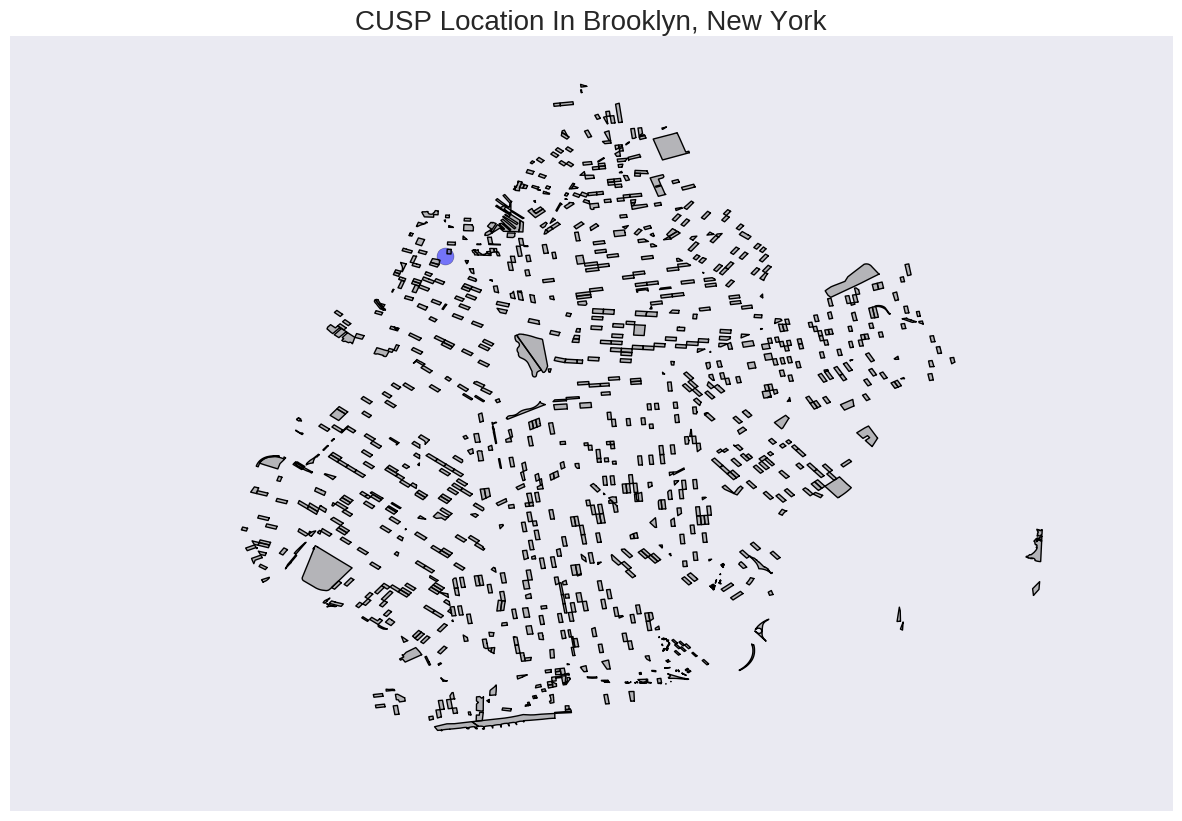

In [41]:
f, ax = plt.subplots(figsize = (15, 10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_latlon[::10].plot(ax = ax, color = "grey")
#GeoDataFrame(ct_latlon.loc[cusp_geo]).plot(ax=ax, color="red")
plt.scatter(cusp_geo.x, cusp_geo.y, s = 150, alpha=0.5)
plt.title("CUSP Location In Brooklyn, New York", fontsize = 20)
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)